## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [8]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline
from keras.callbacks import EarlyStopping 


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_dim, num_neurons = [512, 256, 128], output_num = 10):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_dim)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
          hidden_layer = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer_{}'.format(i+1))(input_layer)
          hidden_layer = keras.layers.BatchNormalization()(hidden_layer)
        else:
          hidden_layer = keras.layers.Dense(units=n_units, activation='relu', name='hideen_layer_{}'.format(i+1))(hidden_layer)
          hidden_layer = keras.layers.BatchNormalization()(hidden_layer)
    output_layer = keras.layers.Dense(units=output_num, activation='softmax', name='output_layer')(hidden_layer)
    model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])
    return model

In [7]:
"""Code Here
設定超參數
"""
learning_rate = 1e-3
epochs = 100
batch_size = 256
momentum = 0.95

In [20]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
earlystop = EarlyStopping(monitor='val_accuracy', patience=15, verbose=1)

In [21]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(input_dim=x_train.shape[1:])
optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum, nesterov=True)
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)
model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_data = (x_test, y_test), shuffle = True, callbacks = [earlystop])
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']

results = {'train_loss':train_loss, 
           'train_acc':train_acc, 
           'val_loss':val_loss, 
           'val_acc':val_acc}

Epoch 1/100
196/196 [==============================] - 2s 8ms/step - loss: 2.1311 - accuracy: 0.2895 - val_loss: 1.7774 - val_accuracy: 0.3726
Epoch 2/100
196/196 [==============================] - 1s 6ms/step - loss: 1.5689 - accuracy: 0.4501 - val_loss: 1.5889 - val_accuracy: 0.4375
Epoch 3/100
196/196 [==============================] - 1s 6ms/step - loss: 1.4496 - accuracy: 0.4888 - val_loss: 1.5291 - val_accuracy: 0.4556
Epoch 4/100
196/196 [==============================] - 1s 6ms/step - loss: 1.3687 - accuracy: 0.5196 - val_loss: 1.5194 - val_accuracy: 0.4581
Epoch 5/100
196/196 [==============================] - 1s 6ms/step - loss: 1.3172 - accuracy: 0.5352 - val_loss: 1.4725 - val_accuracy: 0.4804
Epoch 6/100
196/196 [==============================] - 1s 6ms/step - loss: 1.2520 - accuracy: 0.5621 - val_loss: 1.4610 - val_accuracy: 0.4847
Epoch 7/100
196/196 [==============================] - 1s 6ms/step - loss: 1.1992 - accuracy: 0.5820 - val_loss: 1.4697 - val_accuracy: 0.4847

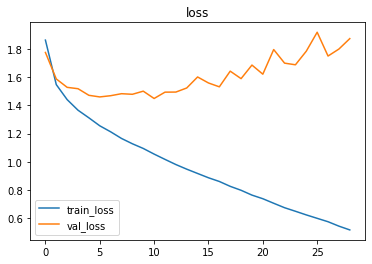

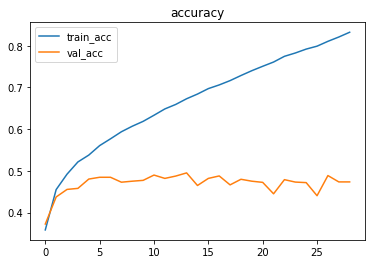

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
# plt.figure(figsize=(15, 12))
plt.plot(range(len(train_loss)), train_loss, label = 'train_loss')
plt.plot(range(len(val_loss)), val_loss, label = 'val_loss')
plt.title('loss')
plt.legend(loc = 'best')
plt.show()

plt.plot(range(len(train_acc)), train_acc, label = 'train_acc')
plt.plot(range(len(val_acc)), val_acc, label = 'val_acc')
plt.title('accuracy')
plt.legend(loc = 'best')
plt.show()